In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from ema_workbench import MultiprocessingEvaluator, ema_logging, load_results
from ema_workbench.analysis import prim, dimensional_stacking

In [7]:
experiments, outcomes = load_results('./data/results.tar.gz')

In [9]:
experiments = pd.DataFrame(experiments)
outcomes = pd.DataFrame(outcomes)

In [67]:
outcomes_focus = outcomes.drop(columns=['All Costs'])

In [23]:
results = pd.concat([experiments, outcomes])

In [49]:
uncertainties = experiments.iloc[:, :19]
levers = experiments.iloc[:, 19:50]

In [71]:
X = uncertainties
y = outcomes_focus['Expected Number of Deaths']

In [87]:
Y = y < 0.8

In [91]:
prim_algorithm = prim.Prim(X, Y, threshold = 0.8)
box1 = prim_algorithm.find_box()

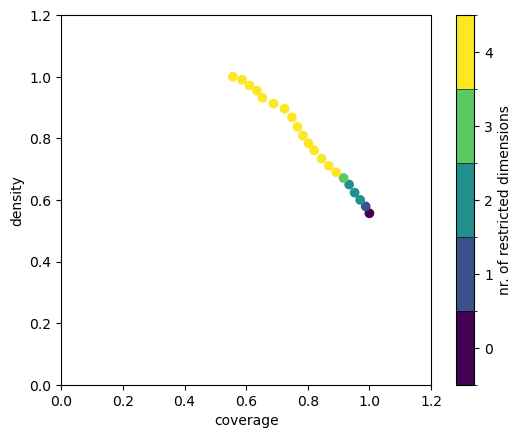

In [93]:
box1.show_tradeoff()
plt.show()

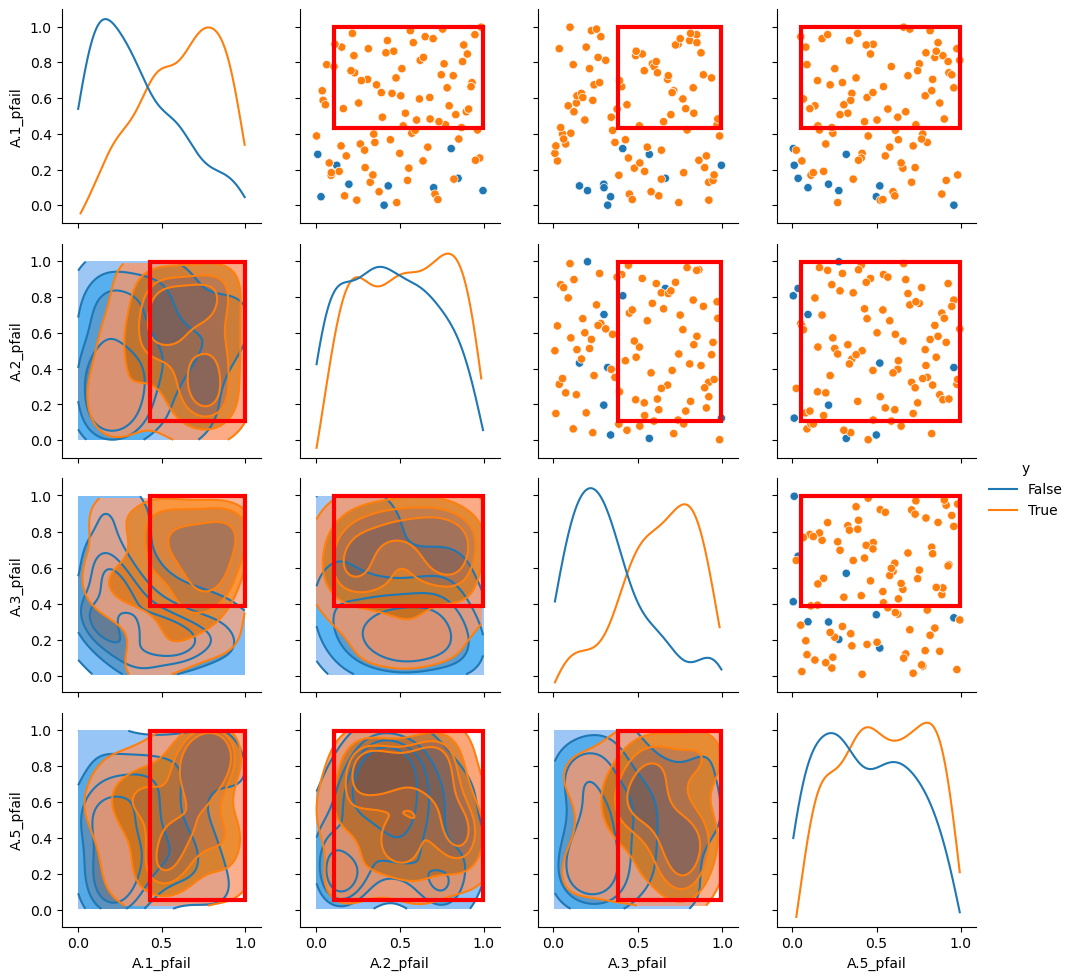

In [97]:
box1.show_pairs_scatter()
plt.show()

In [107]:
scenarios_of_interest = box1.peeling_trajectory
scenarios_of_interest = scenarios_of_interest[(scenarios_of_interest.coverage > 0.8) & (scenarios_of_interest.density > 0.6)]

In [113]:
scenarios_of_interest = scenarios_of_interest.sort_values(by='density', ascending=False)
scenarios_of_interest

,coverage,density,id,k,mass,mean,n,res_dim
10,0.802395,0.783626,10,134,0.57,0.783626,171,4
9,0.820359,0.761111,9,137,0.60,0.761111,180,4
8,0.844311,0.734375,8,141,0.64,0.734375,192,4
7,0.868263,0.710784,7,145,0.68,0.710784,204,4
6,0.892216,0.689815,6,149,0.72,0.689815,216,4
5,0.916168,0.671053,5,153,0.76,0.671053,228,3
4,0.934132,0.650000,4,156,0.80,0.650000,240,2
3,0.952096,0.623529,3,159,0.85,0.623529,255,2
